# lec03_basic_model_이미지

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## Seed 고정

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)  # tensor seed 고정
np.random.seed(1234)      # 행열 연산 seed 고정

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()  # train,test용 각각 문제, 답안을 튜플형태로 반환
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[:1].shape,y_train[:1],X_train[:1]

((1, 28, 28),
 array([5], dtype=uint8),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 

# EDA
- imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    - 픽셀 좌표값을 색으로 채워서 그림으로 보여줌(행열의 픽셀 좌표를 가지고 있어야 함)
<pre>
- Z = 픽셀 값을 갖는 행렬
    plt.imshow(Z)
    plt.show()
<br><br>
<pre>
<b>matplotlib.pyplot.imshow(X, cmap=None, </b>
                    norm=None, aspect=None, interpolation=None, alpha=None
                    , vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None

## mnist

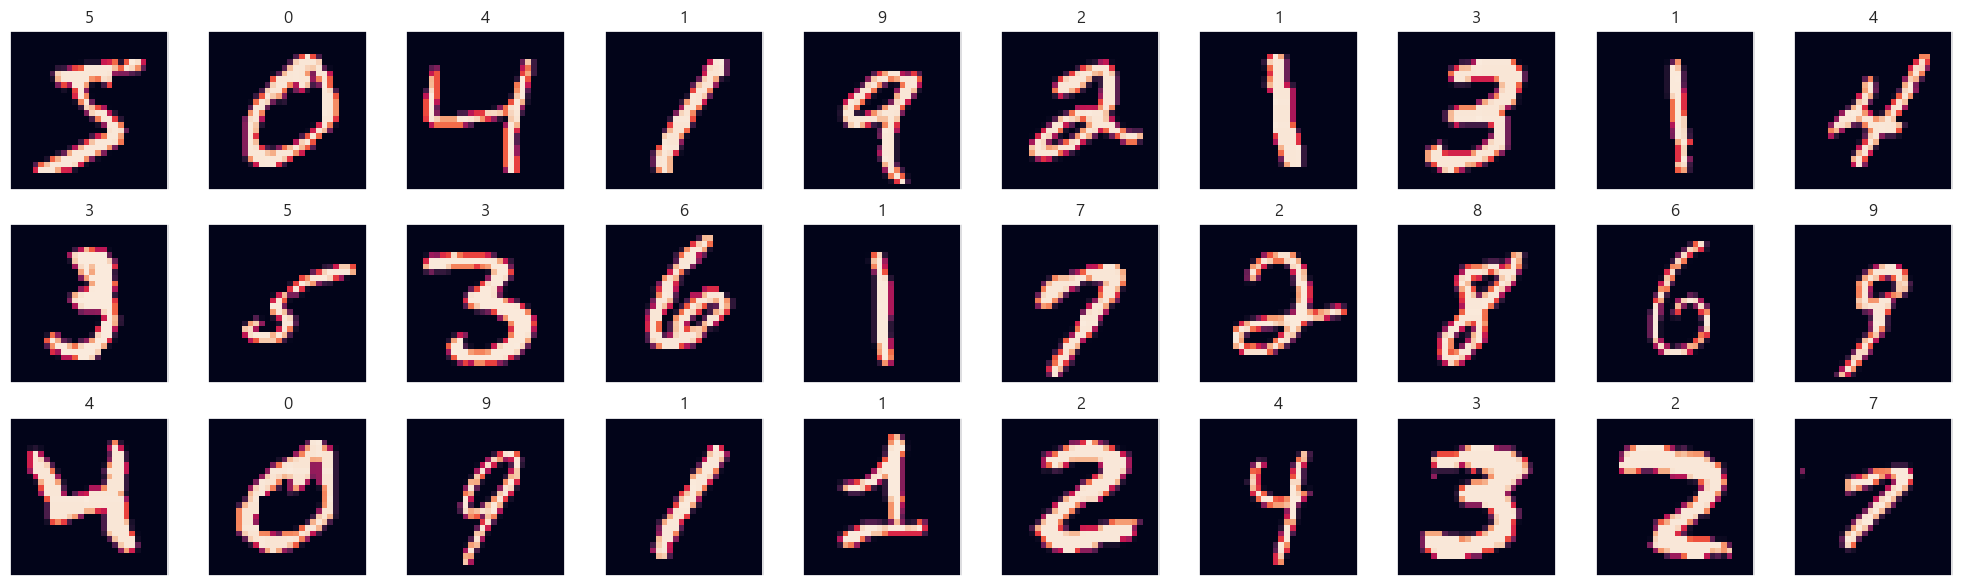

In [6]:
fig,axes= plt.subplots(3,10,figsize=(20,6))

for i  in range(30):
    # print(f"i : {i} , x_img : {x_img} ")
    r=i//10
    c=i%10
    axes[r][c].imshow(X_train[i])
    axes[r][c].set_title(y_train[i])
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
plt.tight_layout()
plt.show()

## target 분포도

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


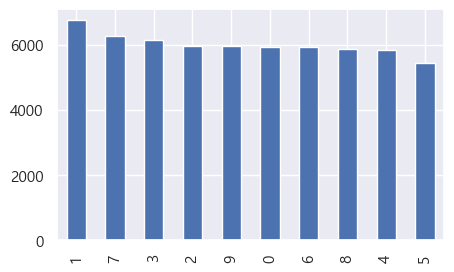

In [7]:
print(pd.Series(y_train).value_counts().sort_index())
plt.figure(figsize=(5,3))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## mnist : 숫자 n번 이미지 

[  4  19  22  33  43  45  48  54  57  80  87 110 116 133 153 154 162 167
 170 172 176 183 195 226 227 247 264 267 280 282]


<Figure size 500x300 with 0 Axes>

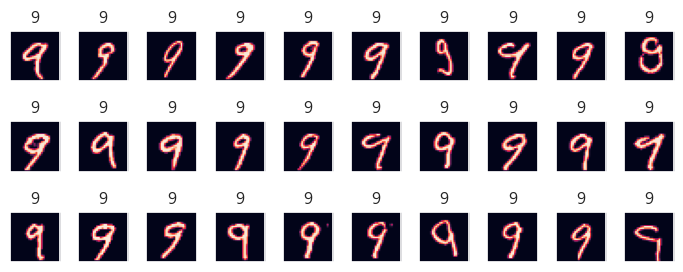

In [8]:
plt.figure(figsize=(5,3))
s=pd.Series(y_train)
idx=s[s.values==9].index[:30].values
print(idx)

fig,axes= plt.subplots(3,10,figsize=(7,3))

# for i  in range(10):
for i,x  in enumerate(idx):
    # print(i,x)
    r=i//10
    c=i%10
    axes[r][c].imshow(X_train[x])
    axes[r][c].set_title(y_train[x])
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
plt.tight_layout()
plt.show()

In [9]:
s.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [10]:
plt.figure(figsize=(5,3))

idx_list=[]
for i in range(10):
    idx=s[s.values==i].index[:10].values
    # print(idx)
    idx_list.extend(idx)
len(idx_list)

100

<Figure size 500x300 with 0 Axes>

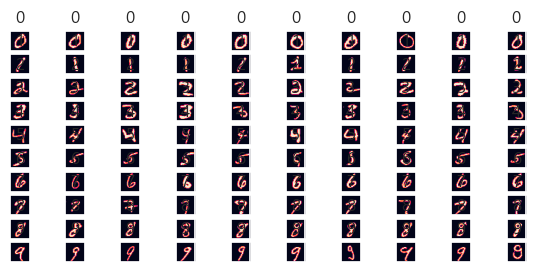

In [11]:
fig,axes= plt.subplots(10,10,figsize=(7,3))

# for i  in range(10):
for i,x  in enumerate(idx_list):
    # print(i,x)
    r=i//10
    c=i%10
    axes[r][c].imshow(X_train[x])
    axes[r][c].set_title(y_train[x])
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
plt.tight_layout()
plt.show()

# 전처리 가공

## Flatten
- 뉴럴 네트워크에 데이터를 집어넣기 위해서는 1차로 바꿔야 함
- 이미지 픽셀 28*28 : 행렬(2D) --> array(1D)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train[:1].shape # [[[ 0. 60000*28*28     # 한장(28*28)

(1, 28, 28)

In [14]:
X_train[0].shape     #  [[ 0,...,28], # 픽셀
                     #   [ 0,...,28],
                     #  ]

(28, 28)

In [15]:
X_train[0][0].shape  # [ 0,...,0] # 컬러 픽셀(한줄의 픽셀)

(28,)

In [16]:
X_train[0].flatten().shape

(784,)

In [17]:
X_train=X_train.reshape(60000,-1)
X_train.shape # 한줄이 하나의 이미지
X_test=X_test.reshape(10000,-1)

## 정규화(픽셀값 스케일링)
- 0 ~ 255 픽셀 값을 0 ~ 1 값으로 변경
- MinMaxScaler

In [18]:
X_train_scaler=X_train/255.0
X_test_scaler=X_test/255.0

print(X_train[:1])
print(X_train_scaler[:1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
  247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
  170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
    0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
   82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
  253 253 253 253 198 182 247 241   0 

## 타켓 더미화
- sklearn: OneHotEncoder(),  get_dummies()
- keras : utils.to_categorical
- 0 ~ 9 숫자 : 원핫인코딩
<pre>
    - 0 : 1 0 0 0 0 0 0 0 0 0
    - 1 : 0 1 0 0 0 0 0 0 0 0

In [19]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh = to_categorical(y_test, num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[5 0 4 1 9]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


# 모델

In [20]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal

In [21]:
model = Sequential()
#               input_shape=(28,28) or input_dim= 28*28
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #한장씩 들어와야 함 (28*28)
model.add(Dense(units=100,  activation='relu'))             
model.add(Dense(units=60,  activation='relu'))              
model.add(Dense(units=10,  activation='softmax'))           
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
fit_hisroty = model.fit(X_train_scaler, y_train_oh, validation_data=(X_test_scaler, y_test_oh), batch_size = 128, epochs=10)
print(fit_hisroty)
print(model.evaluate(X_test_scaler, y_test_oh))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2763 - accuracy: 0.9182 - val_loss: 0.1241 - val_accuracy: 0.9615
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1015 - accuracy: 0.9694 - val_loss: 0.0895 - val_accuracy: 0.9720
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0788 - val_accuracy: 0.9740
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0763 - val_accuracy: 0.9756
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0764 - val_accuracy: 0.9767
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0723 - val_accuracy: 0.9798
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 

## 평가 시각화

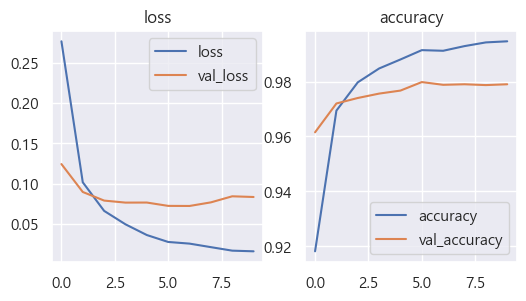

In [23]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [26]:
proba=model.predict(X_test_scaler)
proba[:3]

313/313 [==============================] - 1s 2ms/step


array([[2.51373899e-09, 2.14583240e-10, 6.60933919e-10, 8.49736814e-09,
        7.02173183e-13, 4.75601058e-13, 1.71210566e-14, 1.00000000e+00,
        1.31079505e-11, 4.46971100e-08],
       [2.66908051e-10, 3.99434583e-08, 1.00000000e+00, 2.88245983e-10,
        5.57668298e-14, 1.30204769e-09, 5.29145172e-10, 1.35705114e-13,
        1.08674436e-09, 2.37712195e-15],
       [7.10196735e-10, 9.99996424e-01, 4.85581893e-07, 1.10412669e-11,
        8.50847073e-07, 4.29833014e-09, 1.92940638e-06, 1.54101940e-07,
        1.89034836e-07, 3.44142315e-09]], dtype=float32)

In [28]:
pred=np.argmax(proba, axis=1)
y_test=np.argmax(y_test_oh,axis=1)

print(pred[:3],y_test[:3])

[7 2 1] [7 2 1]


## 오답 검증
- confusion_matrix
- crosstab

### confusion_matrix

In [34]:
from sklearn.metrics import confusion_matrix
res= confusion_matrix(y_test,pred)
res

array([[ 971,    1,    0,    0,    1,    0,    4,    0,    2,    1],
       [   0, 1127,    1,    0,    0,    1,    2,    1,    3,    0],
       [   9,    4,  994,    8,    4,    0,    4,    5,    4,    0],
       [   0,    0,    1,  989,    0,    9,    0,    5,    0,    6],
       [   2,    1,    1,    0,  967,    1,    4,    0,    2,    4],
       [   2,    0,    0,    4,    1,  877,    5,    0,    2,    1],
       [   2,    2,    0,    1,    8,    3,  941,    0,    1,    0],
       [   0,    4,    6,    1,    2,    0,    0, 1010,    2,    3],
       [   4,    1,    1,    6,    5,    6,    2,    3,  941,    5],
       [   1,    3,    0,    6,   15,    5,    0,    6,    0,  973]],
      dtype=int64)

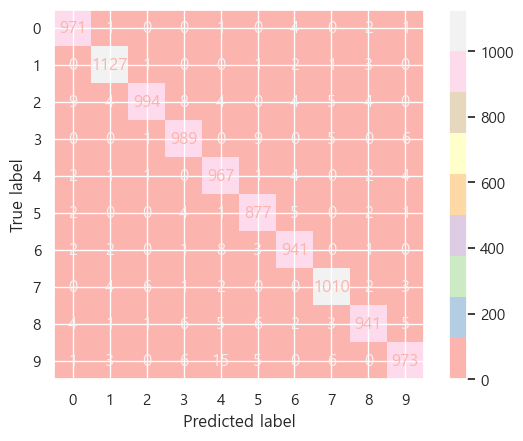

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=res)
disp.plot(cmap='Pastel1')
plt.show()

### crosstab

In [65]:
pd.crosstab(y_test,pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,1,0,0,1,0,4,0,2,1
1,0,1127,1,0,0,1,2,1,3,0
2,9,4,994,8,4,0,4,5,4,0
3,0,0,1,989,0,9,0,5,0,6
4,2,1,1,0,967,1,4,0,2,4
5,2,0,0,4,1,877,5,0,2,1
6,2,2,0,1,8,3,941,0,1,0
7,0,4,6,1,2,0,0,1010,2,3
8,4,1,1,6,5,6,2,3,941,5


### 오답 idx

In [29]:
ans_df=pd.DataFrame({"y_test":y_test,"pred":pred})
ans_df.head()

,y_test,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [83]:
ans_df[ans_df['y_test']!=ans_df['pred']].sort_values('y_test').index

Int64Index([4880, 7216, 1621, 3818, 9634, 8325,  717, 4065, 2185, 4201,
            ...
            2414, 2582, 3060, 1414, 3503, 1247, 1232, 4259,  882, 9642],
           dtype='int64', length=210)

In [84]:
idx_list=ans_df[ans_df['y_test']!=ans_df['pred']].sort_values('y_test').index
idx_list

Int64Index([4880, 7216, 1621, 3818, 9634, 8325,  717, 4065, 2185, 4201,
            ...
            2414, 2582, 3060, 1414, 3503, 1247, 1232, 4259,  882, 9642],
           dtype='int64', length=210)

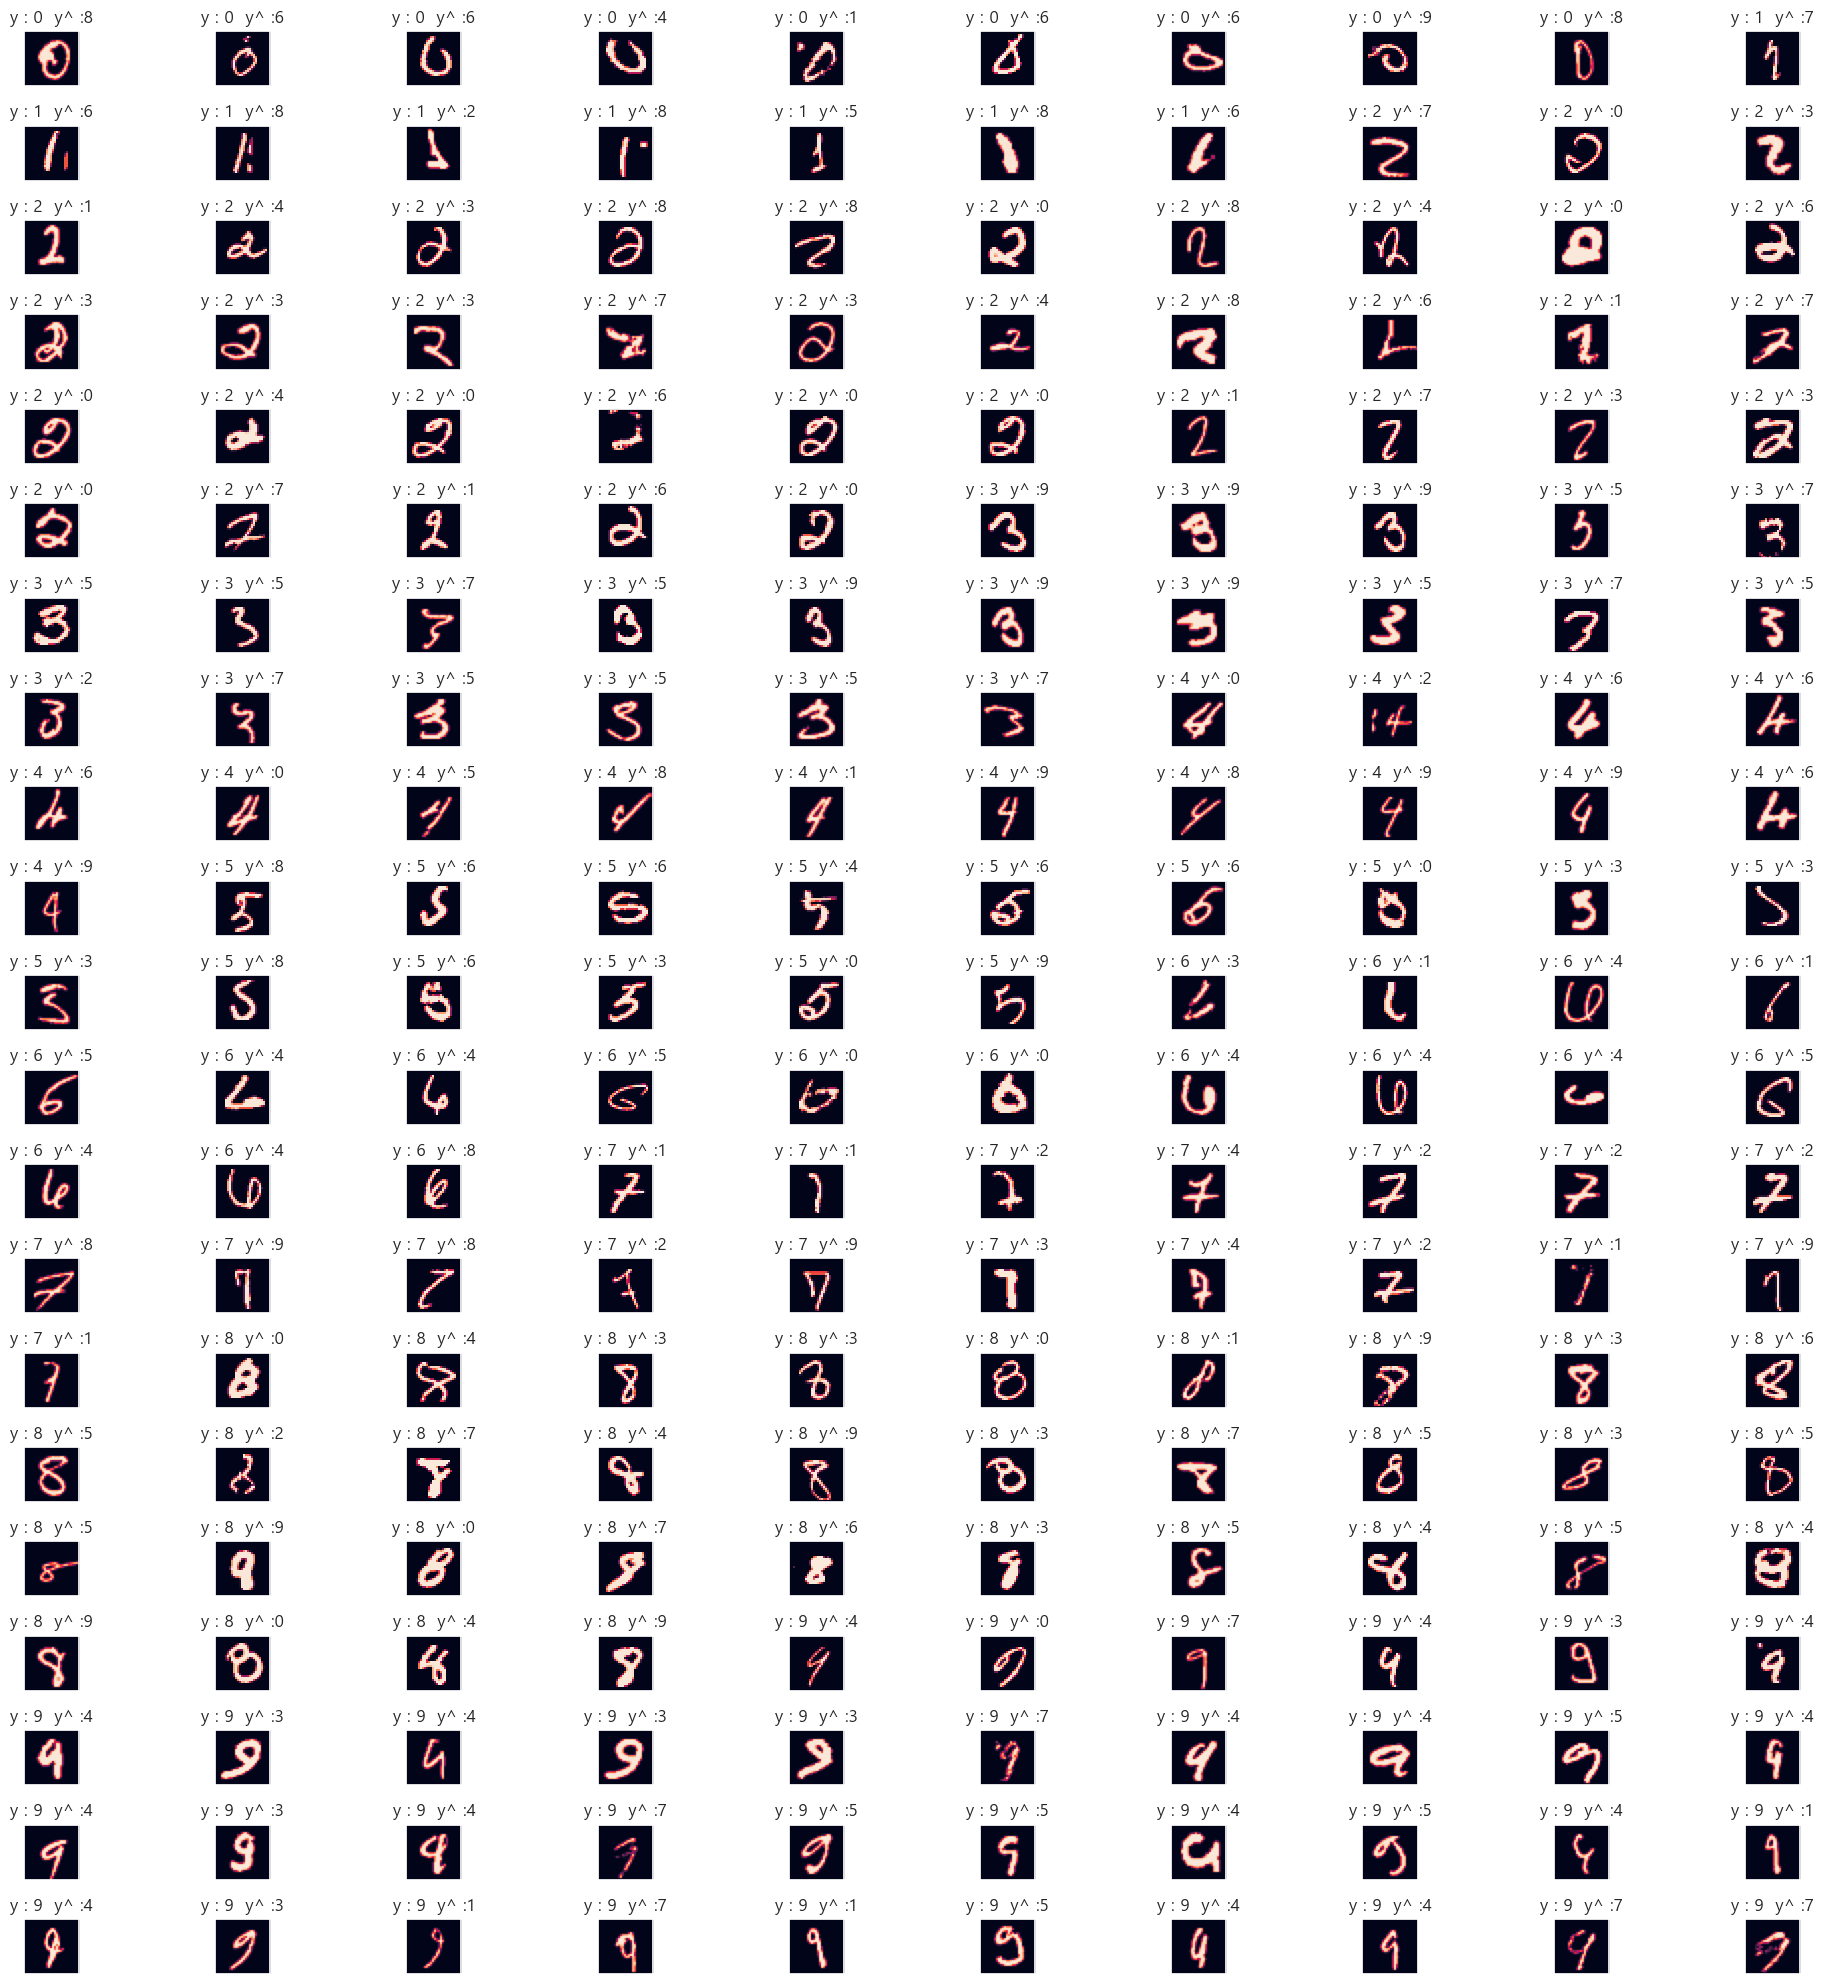

In [95]:
fig,axes= plt.subplots(21,10,figsize=(20,20))
for i,idx  in enumerate(idx_list):
    # print(i,idx_val)
    r=i//10
    c=i%10
    axes[r][c].imshow(X_test[idx].reshape(28,28))
    axes[r][c].set_title(f"y : {ans_df.loc[idx,'y_test']}  y^ :{ans_df.loc[idx,'pred']}")
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
plt.tight_layout()
plt.show()

In [96]:
# rlt_df = ans_df[ans_df['pred']!= ans_df['y_test']]
# rlt_df = rlt_df.sort_values(by='y_test')

# plt.figure(figsize=(20,20))

# for i, v in enumerate(rlt_df.index.values):
#     plt.subplot(20,11,i+1)
#     plt.title(f'y:{rlt_df.iloc[i, 0]} y^:{rlt_df.iloc[i, 1]}')
#     plt.imshow(X_test[v].reshape(28,28))
#     plt.axis('off')
#     plt.grid(False)
    
# plt.tight_layout()    
# plt.show()

# 사용자 데이터 예측
- Widget
- ref : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [87]:
# ! pip install ipywidgets

In [114]:
import ipywidgets as widgets
btn =widgets.FileUpload(
    accept='image/*',  # '.png' '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True  # True to accept multiple files upload else False
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [123]:
btn.value

({'name': '0.png',
  'type': 'image/png',
  'size': 445,
  'content': <memory at 0x000001F24905CDC0>,
  'last_modified': datetime.datetime(2023, 4, 12, 6, 30, 21, 902000, tzinfo=datetime.timezone.utc)},
 {'name': '2.png',
  'type': 'image/png',
  'size': 438,
  'content': <memory at 0x000001F24905C4C0>,
  'last_modified': datetime.datetime(2023, 4, 12, 6, 30, 43, 467000, tzinfo=datetime.timezone.utc)},
 {'name': '3.png',
  'type': 'image/png',
  'size': 444,
  'content': <memory at 0x000001F24905CF40>,
  'last_modified': datetime.datetime(2023, 4, 12, 5, 52, 57, 140000, tzinfo=datetime.timezone.utc)},
 {'name': '5.png',
  'type': 'image/png',
  'size': 373,
  'content': <memory at 0x000001F24905C7C0>,
  'last_modified': datetime.datetime(2023, 4, 12, 5, 53, 9, 921000, tzinfo=datetime.timezone.utc)},
 {'name': '6.png',
  'type': 'image/png',
  'size': 414,
  'content': <memory at 0x000001F24905CE80>,
  'last_modified': datetime.datetime(2023, 4, 12, 5, 48, 37, 551000, tzinfo=datetime.ti

In [124]:
for dic in btn.value:
    display(widgets.Image(value=dic['content'].tobytes()))

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00.\x00\x00\x009\x08\x02\x00\x00\x00\xc6\x08\x8eC\x…

0.png  445
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 24ms/step
5
2.png  438
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 21ms/step
5
3.png  444
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 22ms/step
5
5.png  373
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 23ms/step
5
6.png  414
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 23ms/step
7
7.png  284
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 28ms/step
5
8.png  424
(28, 28, 3) (28, 28)
(1, 784)
(1, 784)
1/1 [==============================] - 0s 23ms/step
5


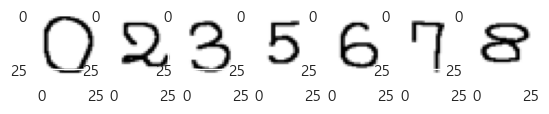

In [125]:
from PIL import Image  # 파이썬 이미지 라이브러리
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1,len(btn.value),i+1)
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr = dic['content']      # 메모리 주소
    # bbyte = addr.tobytes()     # 메모리에 있는 것을 binary(bytes)로 꺼내옴
    # io_obj = io.BytesIO(addr)  # 메모리에 있는 것을 r,w 할 수 있는 io 객체를 꺼냄
    # print(addr, bbyte, io_obj)
    # ------------------------------------------------
    # display(widgets.Image(value=dic.content.tobytes()))  # 이미지 보기
    # ------------------------------------------------
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28)) # io 객체를 이용하여 이미지 오픈
    plt.imshow(img)
    # ------------------------------------------------
    print(np.array(img).shape,  np.array(img)[:, :, 1].shape)
    
    img = np.array(img)[:, :, 1]                    # (28, 28, 3) : 28*28로 맞추기 위해 컬러맵(3)을 제거 (차원축소)
    img = (np.expand_dims(img,0)).reshape(1,-1)     # img[None , ... ]  차원 확대 (1, 28, 28) 사진 1장  => flatten(1D)
    print(img.shape) 

    img_scaler = img/255.0    # scaling
    # img_scaler=( 255 - img ) / 255.0    # 색 반전(이미지 엣지 검출) : 흑백 반전  --> 예측력 ↑
    
    print(img_scaler.shape)
    proba = model.predict(img_scaler)
    print(np.argmax(proba))